In [1]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import data_prep
import analyze_image

### Prepare all the variable

In [2]:
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
path_source = os.environ.get('PATH_DATASET_COMBINED')
dataset_labels = ['normal', 'glaukoma']

### Create the metadata

In [3]:
path_all_dataset = []
for dataset_name in dataset_names:
    path_all_dataset.append(os.path.join(path_source, dataset_name))

path_source_rimone, path_source_g1020, path_source_refuge, path_source_papila = path_all_dataset

del dataset_name

In [4]:
file_names = {}
for index, dataset_path in enumerate(path_all_dataset):
    temp_dict = {}
    for label_name in dataset_labels:
        temp_dict[label_name] = data_prep.get_file_names(path=os.path.join(dataset_path,
                                                                            label_name))
    file_names[dataset_names[index]] = temp_dict

del index, dataset_path, temp_dict, label_name

In [5]:
metadata_images = analyze_image.create_metadata(dataset_names=dataset_names,
                                                dataset_labels=dataset_labels,
                                                file_names=file_names,
                                                path_source=path_source)
metadata_images

,dataset,label,file_name,width,height,color_space,path
0,rimone,normal,r1_Im001.png,462,462,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
1,rimone,normal,r1_Im003.png,524,524,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
2,rimone,normal,r1_Im004.png,476,476,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
3,rimone,normal,r1_Im006.png,320,320,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
4,rimone,normal,r1_Im008.png,316,316,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
...,...,...,...,...,...,...,...
3188,papila,glaukoma,RET264OS.jpg,2576,1934,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
3189,papila,glaukoma,RET265OD.jpg,2576,1934,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
3190,papila,glaukoma,RET265OS.jpg,2576,1934,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
3191,papila,glaukoma,RET276OD.jpg,2576,1934,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...


In [6]:
metadata_images['dataset'].value_counts()

dataset
refuge    1200
g1020     1020
papila     488
rimone     485
Name: count, dtype: int64

In [7]:
metadata_rimone = metadata_images[metadata_images['dataset'] == 'rimone']
metadata_g1020 = metadata_images[metadata_images['dataset'] == 'g1020']
metadata_refuge = metadata_images[metadata_images['dataset'] == 'refuge']
metadata_papila = metadata_images[metadata_images['dataset'] == 'papila']

### Check the Rim one dataset

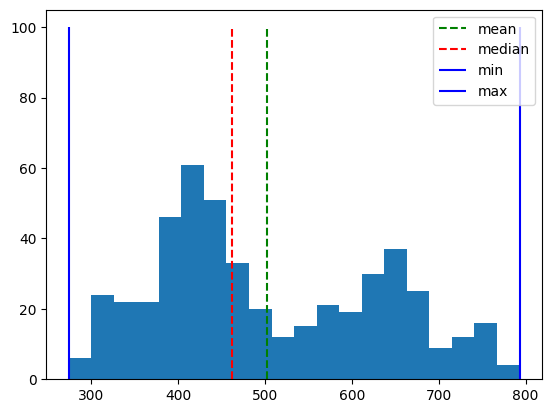

In [19]:
rimone_stat = analyze_image.visualize_data_distribution(metadata=metadata_rimone,
                                        min_line_height=0,
                                        max_line_height=100,
                                        bin_count=20)

In [20]:
rimone_stat['median']

462.0

In [21]:
metadata_rimone.loc[metadata_rimone.width == rimone_stat['median']]
# the picture size will be resized to 462x462

,dataset,label,file_name,width,height,color_space,path
0,rimone,normal,r1_Im001.png,462,462,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
234,rimone,normal,r3_N-16-R_left_half.png,462,462,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
303,rimone,normal,r3_N-83-L_left_half.png,462,462,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...


### Check the g1020 dataset

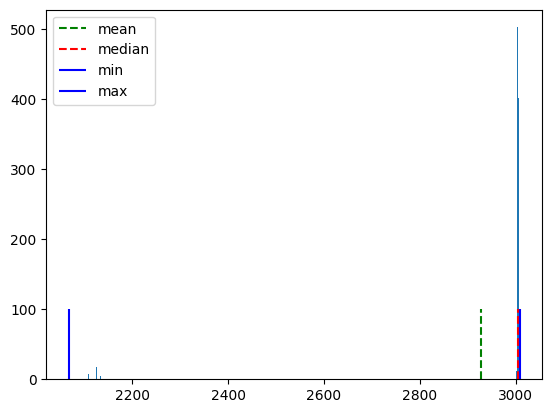

In [28]:
g1020_stat = analyze_image.visualize_data_distribution(metadata=metadata_g1020,
                                        min_line_height=0,
                                        max_line_height=100,
                                        bin_count=500)

In [29]:
g1020_stat['median']

3004.0

In [30]:
metadata_g1020

,dataset,label,file_name,width,height,color_space,path
485,g1020,normal,image_0.jpg,3004,2423,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
486,g1020,normal,image_1.jpg,3005,2424,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
487,g1020,normal,image_10.jpg,3006,2425,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
488,g1020,normal,image_103.jpg,3004,2421,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
489,g1020,normal,image_1034.jpg,3004,2424,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
...,...,...,...,...,...,...,...
1500,g1020,glaukoma,image_904.jpg,3004,2423,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
1501,g1020,glaukoma,image_915.jpg,3005,2423,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
1502,g1020,glaukoma,image_916.jpg,3004,2422,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...
1503,g1020,glaukoma,image_940.jpg,3006,2425,RGB,d:\\Programming\\Python\\Skripsi\\dataset\\com...


In [32]:
metadata_g1020.loc[metadata_g1020.width == g1020_stat['median'], 'height'].value_counts()
# the picture size will be resized to 3004x2423

height
2423    262
2424    152
2425     26
2422     23
2421      3
Name: count, dtype: int64

###